# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Jacopo De Stefani - __[Jacopo.De.Stefani@ulb.ac.be](mailto:Jacopo.De.Stefani@ulb.ac.be)__
### Théo Verhelst - __[Theo.Verhelst@ulb.ac.be](mailto:Theo.Verhelst@ulb.ac.be)__

## TP 2 - Linear Models

####  March 09, 2021

#### Materials originally developed by *Yann-Aël Le Borgne, Fabrizio Carcillo and Gianluca Bontempi*


## Repetition

### Estimation using the mean square error

Assume to have $N$ observation pairs $(x_i,y_i)$ generated by the following stochastic process

\begin{equation*}
 y_i=\beta_0+\beta_1 x_i +w_i,
\end{equation*}

where the $w_i$ are iid realisations of a random variable $\mathbf{w}$ with mean zero and constant variance $\sigma^2_{\mathbf{w}}$.

The $x_i$ can be seen as *fixed*, the only random component in the sample set $D_N$ is therefore contained in the $y_i$ (which are random due to the $w_i$).

The coefficients $\beta_0$ and $\beta_1$ can be estimated using the least squares method. This method consists of taking those estimators $\hat{\beta_0}$ and $\hat{\beta_1}$ which minimize

\begin{equation}
 R_{emp}=\sum_{i=1}^N (y_i-\hat{y_i})^2
\end{equation}

where 

\begin{equation}
 \hat{y_i}=\hat{\beta_0}+\hat{\beta_1} x_i.
\end{equation}

This is equivalent to 

\begin{equation}
 \{\hat{\beta_0},\hat{\beta_1}\}=\arg\min_{b_0,b_1}\sum_{i=1}^N (y_i-b_0-b_1x_i)^2.
\end{equation}

The solution is given by *(Eq. 1)*

\begin{equation}
 \hat{\beta_1}=\frac{S_{xy}}{S_{xx}},\quad \hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x},  
\end{equation}

where *(Eq. 2)*

\begin{equation}
 \bar{x}=\frac{\sum_{i=1}^Nx_i}{N},\quad\bar{y}=\frac{\sum_{i=1}^Ny_i}{N},\quad S_{xy}=\sum_{i=1}^N (x_i-\bar{x})y_i,\quad S_{xx}=\sum_{i=1}^N(x_i-\bar{x})^2.
\end{equation}

### Properties of the estimator

* $E_{D_N}[\hat{\beta_1}]=\beta_1$
* $Var[\hat{\beta_1}]=\frac{\sigma^2}{S_{xx}}$
* $E[\hat{\beta_0}]=\beta_0$
* $Var[\hat{\beta_0}]=\sigma^2\left( \frac{1}{N}+\frac{\bar{x}^2}{S_{xx}}\right)$
* $\hat{\sigma}^2_{\mathbf{w}}=\frac{\sum_{i=1}^N(y_i-\hat{y_i})^2}{N-2}$ is a non-biased estimator of $\sigma^2_{\mathbf{w}}$.


### Partitioning the variability

The variability of the response $y_i$ can be expressed as follows

\begin{equation}
 \sum_{i=1}^N(y_i-\bar{y})^2=\sum_{i=1}^N(\hat{y_i}-\bar{y})^2+\sum_{i=1}^N(y_i-\hat{y_i})^2,
\end{equation}

that is

\begin{equation}
 SS_{tot}=SS_{mod}+SS_{res}.
\end{equation}

### The F-test

Goal: test if the variable $y$ is really influenced by the variable $x$. This can be formulated as a hypothesis test $\beta_1=0$. If the test is rejected, it can be deduced that $x$ influences $y$ significantly.

It can be shown that given a normally distributed $\mathbf{w}$: *(Eq. 3)*

\begin{equation}
 \frac{SS_{mod}}{SS_{res}/(N-2)} \sim F_{1,N-2}
\end{equation}

if the hypothesis $\beta_1=0$ is true.

### The t-test

It can be shown that given a normally distributed $\mathbf{w}$:

\begin{equation}
 \hat{\beta_1}\sim \mathcal{N}(\beta_1,\sigma^2 / S_{xx})
\end{equation}

and

\begin{equation}
 \frac{\hat{\beta_1}-\beta_1}{\hat{\sigma}}\sqrt{S_{xx}} \sim \mathcal{T}_{N-2}.
\end{equation}

This can be used for testing the following hypothesis: $\hat{\beta_1}=\beta_1$.

### Confidence intervals

With a probability $1-\alpha$, the true parameter $\beta_1$ lies in the interval *(Eq. 4)*

\begin{equation}
 \hat{\beta_1}\pm t_{\alpha/2,N-2}\cdot \sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}.
\end{equation}

### Variance of the response

Let

\begin{equation}
 \hat{\mathbf{y}}(x)=\hat{\beta_0}+\hat{\beta_1} x.
\end{equation}

We can show that for all $x$:

\begin{equation}
 E_{D_N}[ \hat{\mathbf{y}}(x)]=E_{[y]}[ {\mathbf{y}}(x)]
\end{equation}

and

\begin{equation}
 Var[ \hat{\mathbf{y}}(x)]=\sigma^2\left[\frac{1}{N}+\frac{(x-\bar{x})^2}{S_{xx}}\right].
\end{equation}



In [1]:
options(repr.plot.width=19, repr.plot.height=10)

## Linear regression exercises

### Exercise 1

Compare with the theoretical part of this course (from slide 15 of the chapter [Regression Modelling](https://uv.ulb.ac.be/pluginfile.php/1728621/mod_resource/content/5/linregr.pdf)). 

The goal of this exercise is to investigate the link between two variables originating from medical data by studying the *ventricular shortening velocity* in function of *blood glucose*. 


In [2]:
library(ISwR)
data(thuesen)

I <-! is.na(thuesen[,"short.velocity"])
Y<-thuesen[I,"short.velocity"]
X<-thuesen[I,"blood.glucose"]


In [3]:
dim(thuesen)

[1] 24  2

In [4]:
head(thuesen)

,blood.glucose,short.velocity
,<dbl>,<dbl>
1,15.3,1.76
2,10.8,1.34
3,8.1,1.27
4,19.5,1.47
5,7.2,1.27
6,5.3,1.49




*  Apply the mean square method "by hand" using equations (Eq. 1) and (Eq. 2) to compute the coefficients $\beta_0$ and $\beta_1$ of a linear model for our data. 


In [5]:
N <- length(X)
X_bar <- mean(X)
Y_bar <- mean(Y)

In [6]:
S_xx <- sum((X-X_bar)^2)
S_xy <- sum((X-X_bar)*Y)

b1_hat <- S_xy/S_xx
b0_hat <- Y_bar - b1_hat*X_bar

cat(paste("beta_0:",b0_hat,"\n"))
cat(paste("beta_1:",b1_hat))

beta_0: 1.09781487777238 
beta_1: 0.0219625222599968

*  Test the hypothesis $\beta_1=0$ using an F-test using equation *(Eq. 3)* and the F distribution function `pf` followed by a t-test using equation *(Eq. 4)* and the t distribution function `pt` 


### F - test

- **Hypothesis**: $\beta_1=0$
- **Test statistic**: $\frac{SS_{mod}}{SS_{res}/(N-2)} \sim F_{1,N-2} $


In [7]:
Y_hat <- b0_hat + X*b1_hat
SS_mod <- sum((Y_hat-Y_bar)^2)
SS_res <- sum((Y-Y_hat)^2)
F_stat <- SS_mod / (SS_res/(N-2))
F_prob <- (1-pf(F_stat,df1=1,df2=N-2))

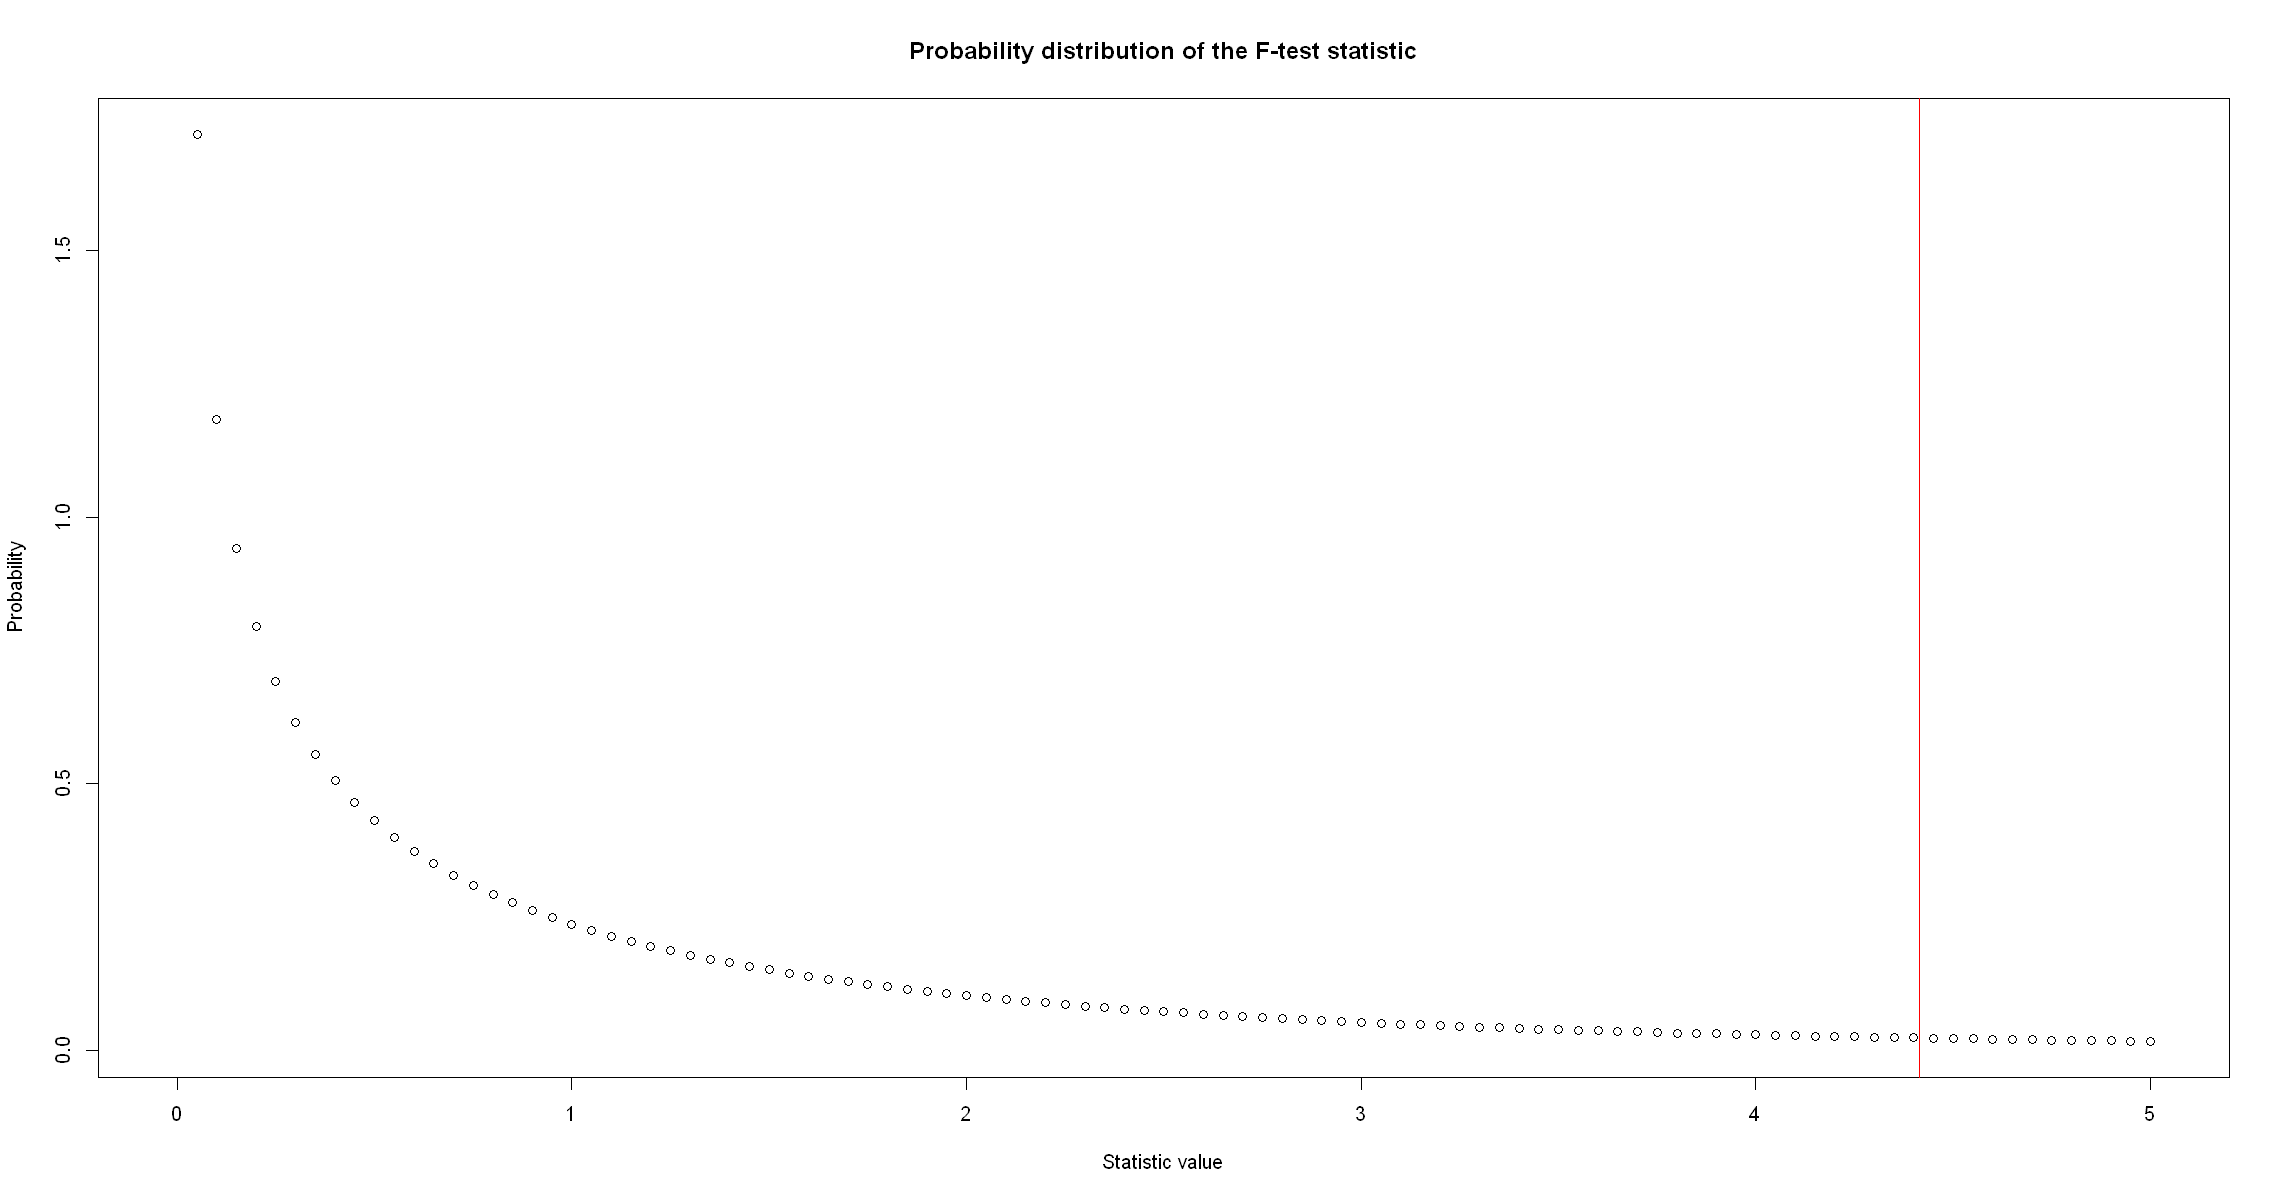

In [8]:
I <- seq(0,5,0.05)
plot(I,df(I,df1=1,df2=N-2),xlab="Statistic value",ylab="Probability",main="Probability distribution of the F-test statistic")
abline(v=F_stat,col="red")

In [9]:
print(paste("F-test result: F.value= ",F_stat))
print(paste("Pr[F >= F.value]= ", F_prob))


[1] "F-test result: F.value=  4.41401843314627"
[1] "Pr[F >= F.value]=  0.0478959109075709"


### T - test

- **Hypothesis**: $\hat{\beta}_1=\beta_1=0$
- **Test statistic**: $\frac{\hat{\beta_1}-\beta_1}{\hat{\sigma}}\sqrt{S_{xx}} \sim \mathcal{T}_{N-2}$


In [10]:
b1 <- 0 # By hypothesis
sigma_hat <- sqrt(sum((Y-Y_hat)^2)/(N-2))
t_stat <- (b1_hat-b1)/sigma_hat * sqrt(S_xx)
t_prob <- 1-pt(t_stat,df=N-2)

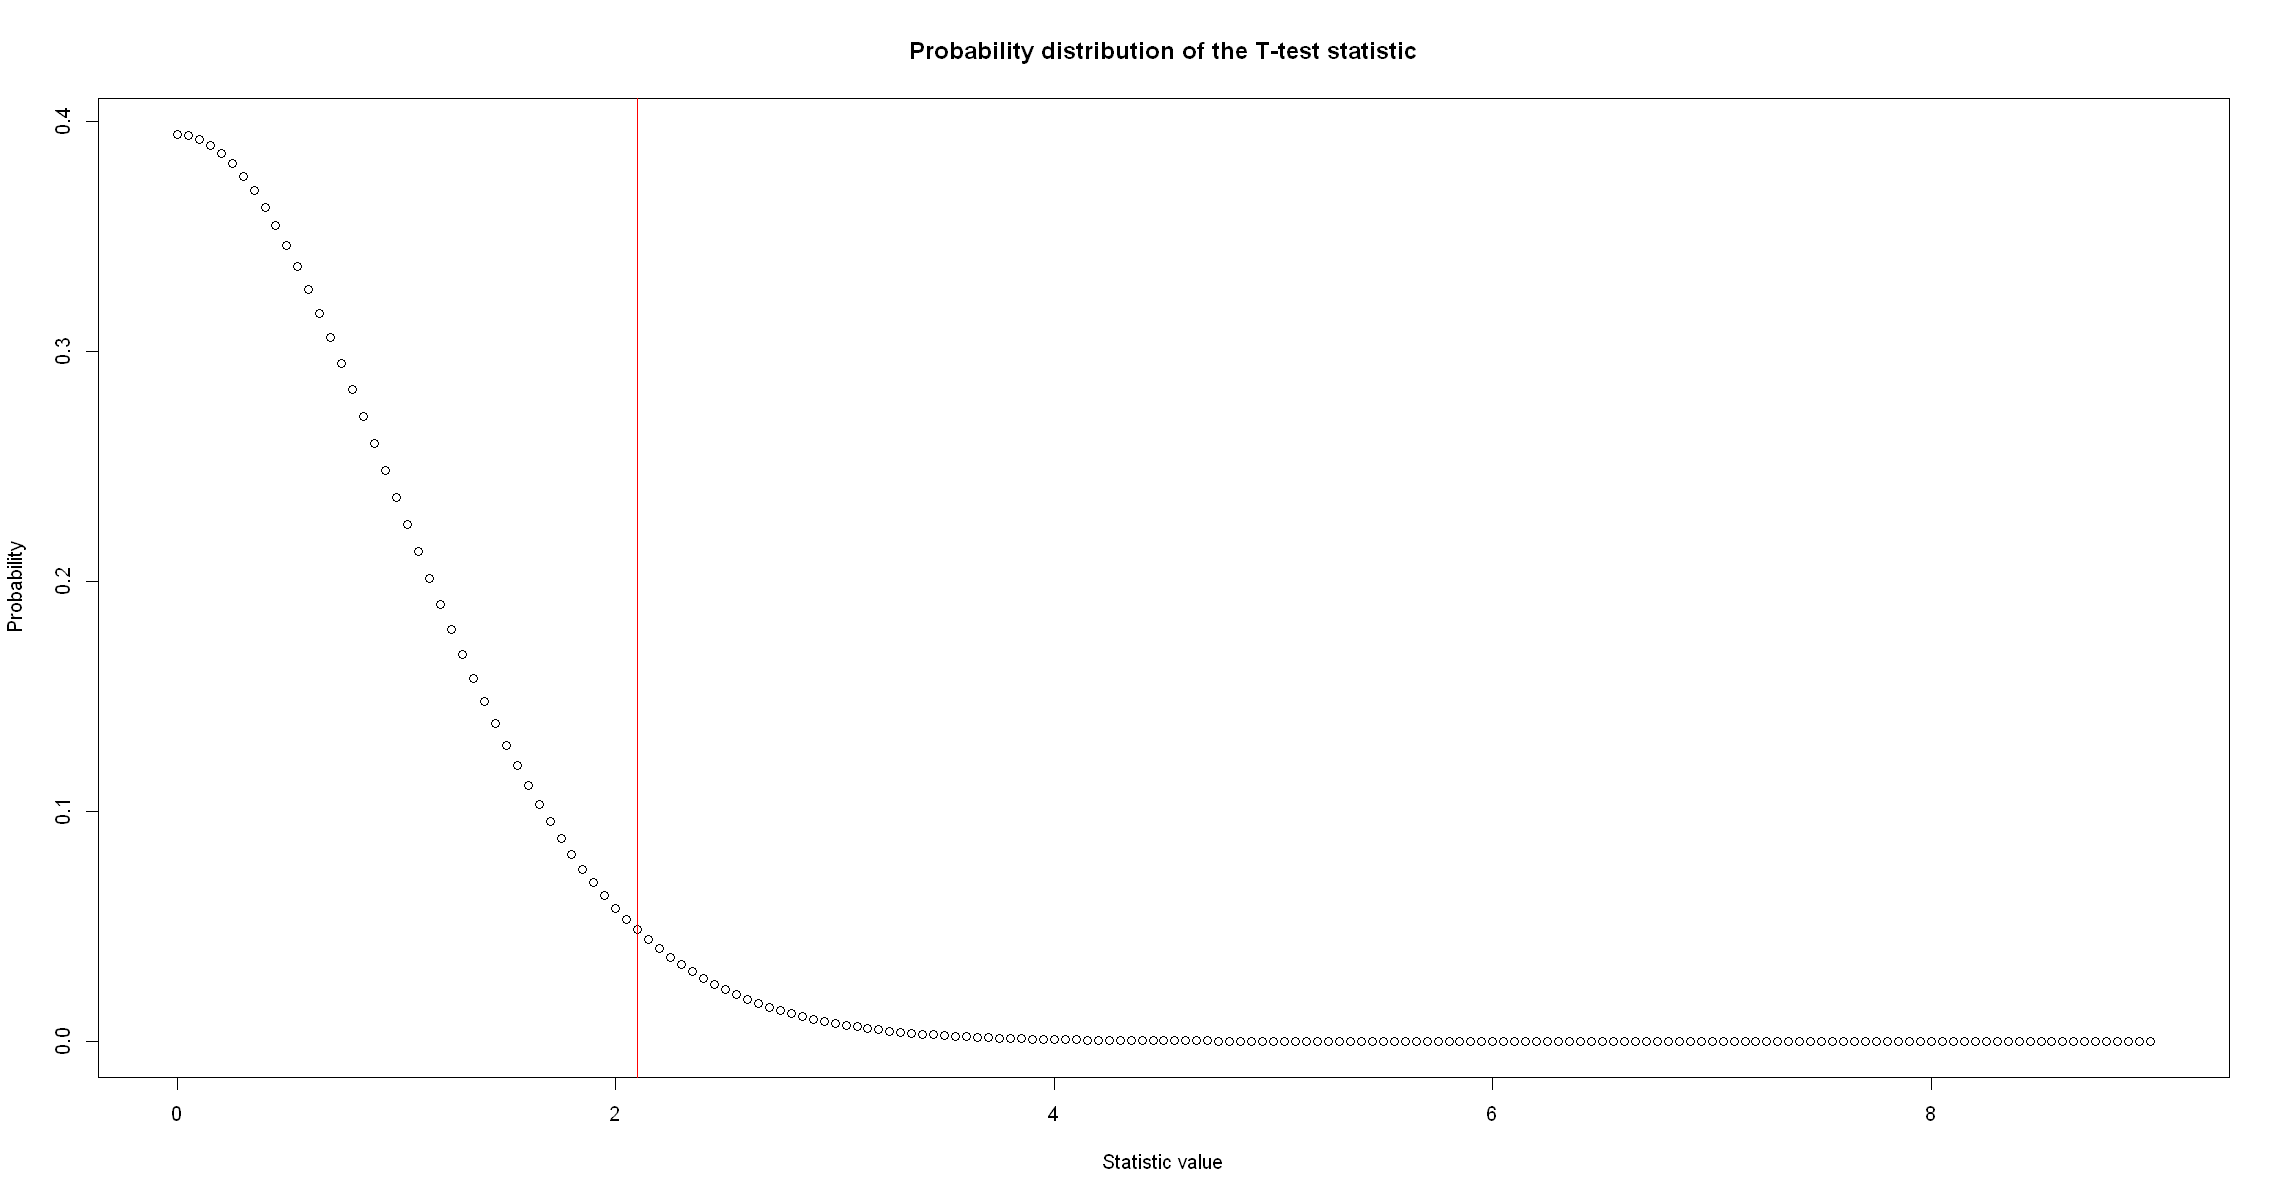

In [11]:
I <- seq(0,9,0.05)
plot(I,dt(I,df=N-2),xlab="Statistic value",ylab="Probability",main="Probability distribution of the T-test statistic")
abline(v=t_stat,col="red")

In [12]:
print(paste("t-test result: t_stat= ",t_stat))
print(paste("Pr[|T| >= t_stat]= ", t_prob))

[1] "t-test result: t_stat=  2.10095655194158"
[1] "Pr[|T| >= t_stat]=  0.0239479554537855"


*  Compute the confidence interval for $\beta_1$ using equation (Eq. 4) and the function `qt`.


### Confidence interval

With a probability $1-\alpha$, the true parameter $\beta_1$ lies in the interval *(Eq. 4)*

\begin{equation}
 \hat{\beta_1}\pm t_{\alpha/2,N-2}\cdot \sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}.
\end{equation}

In [13]:
alpha <- 0.05
P <- 1 - alpha
confidence_bound <- qt(alpha/2,df=N-2,lower.tail=FALSE)*sqrt(sigma_hat^2/S_xx)
cat(paste("Confidence interval = ",b1_hat,"+-",confidence_bound,"-> [",b1_hat-confidence_bound,",",b1_hat+confidence_bound,"]"))

Confidence interval =  0.0219625222599968 +- 0.0217394145132703 -> [ 0.000223107746726497 , 0.043701936773267 ]


*  Use the function `lm`(Y$^{\sim}$X) to obtain the same results automatically and compare these with the ones obtained earlier.


In [14]:
results_lm <- lm(Y~X)
summary(results_lm)


Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40141 -0.14760 -0.02202  0.03001  0.43490 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.09781    0.11748   9.345 6.26e-09 ***
X            0.02196    0.01045   2.101   0.0479 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2167 on 21 degrees of freedom
Multiple R-squared:  0.1737,	Adjusted R-squared:  0.1343 
F-statistic: 4.414 on 1 and 21 DF,  p-value: 0.0479


*  Visualize the data and the regression line


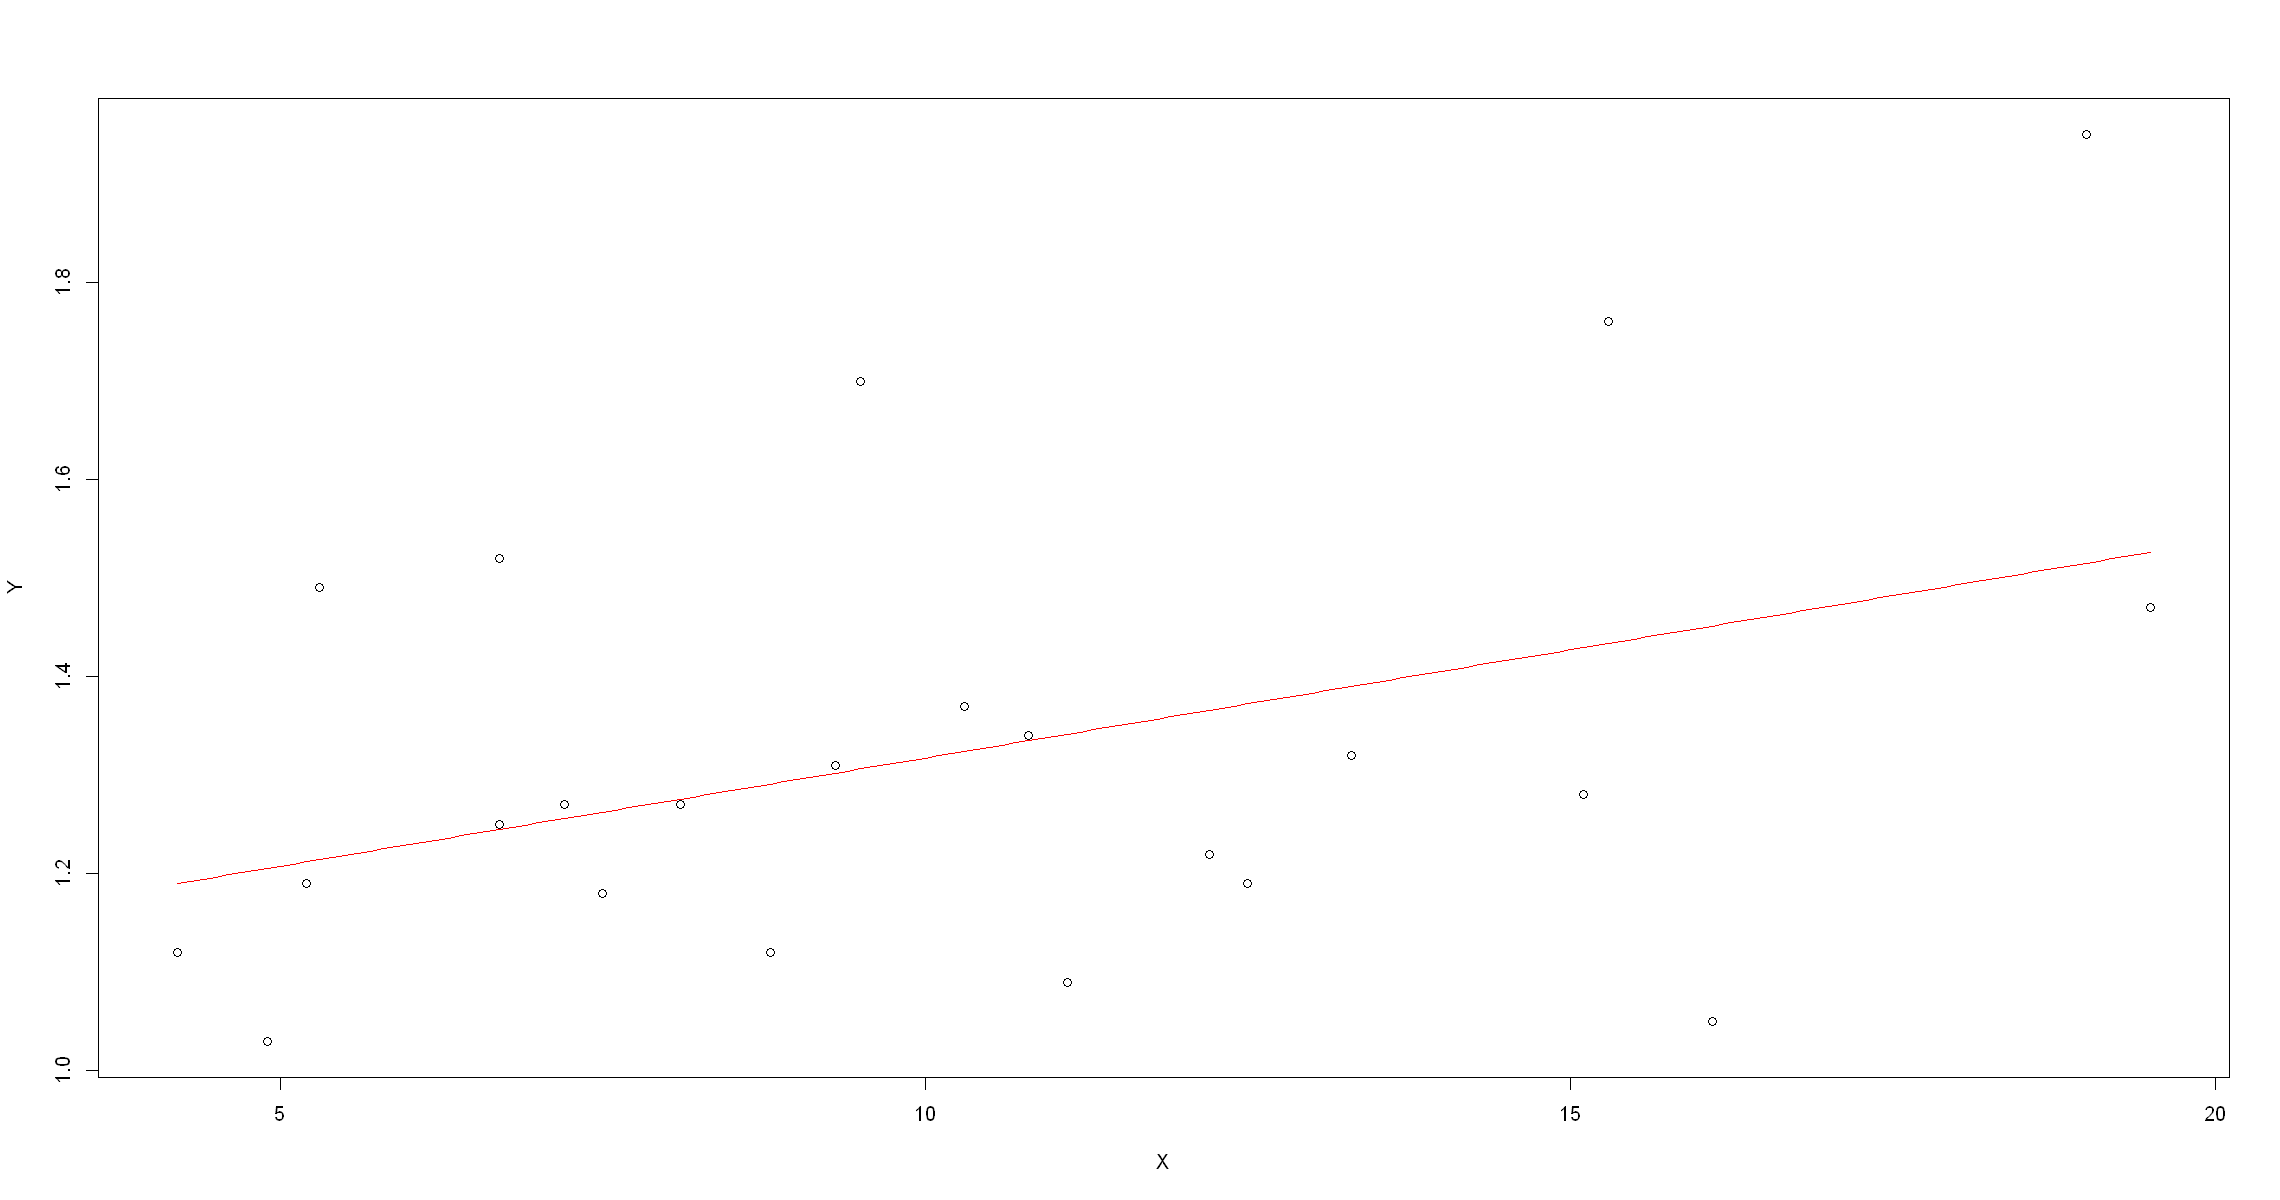

In [15]:
x<-seq(min(X),max(X),by=.1)
plot(X,Y)
lines(x,b0_hat+b1_hat*x,col="blue") # Coefficients computed manually
lines(x,results_lm$coefficients[1]+results_lm$coefficients[2]*x,col="red") # Coefficients computed with lm


### Exercise 2

The goal of this exercise is to experimentally study the bias and the variance of $\hat{\beta_0}$, $\hat{\beta_1}$, $\hat{\sigma}$ and $\hat{\mathbf{y}}(x_i)$. See also the theoretical part of this course (slide 24 of the chapter [Regression Modelling](https://uv.ulb.ac.be/pluginfile.php/1257537/mod_resource/content/4/linregr.pdf)). 


In [16]:
rm(list=ls())
X<-seq(-10,10,by=1) # the x_i are fixed
beta0<--1 # y_i = -1 + x_i + Normal(0,5)
beta1<-1
sd_w<-5
N<-length(X)
R<-100#00 # number of iterations for the simulation


In [17]:
beta_hat_1<-numeric(R)
beta_hat_0<-numeric(R)
sigma_hat_w<-numeric(R)
Y_hat<-array(NA,c(R,N))
Y<-array(NA,c(R,N))



* Compute $\hat{\beta}_0$, $\hat{\beta}_1$ and $\hat{\sigma}$ and plot their distributions.


In [18]:
X_bar <- mean(X)
S_xx <- sum((X-X_bar)^2)

for(i in 1:R){
    Y[i,] <- beta0+beta1*X+rnorm(N,sd=sd_w)
    
    Y_bar <- mean(Y[i,])
    
    S_xy <- sum((X-X_bar)*Y[i,])

    beta_hat_1[i] <- S_xy/S_xx
    beta_hat_0[i] <- Y_bar - beta_hat_1[i]*X_bar
    
    Y_hat[i,] <- beta_hat_0[i] + beta_hat_1[i]*X
    sigma_hat_w[i] <- sqrt(sum((Y[i,]-Y_hat[i,])^2)/(N-2))
}



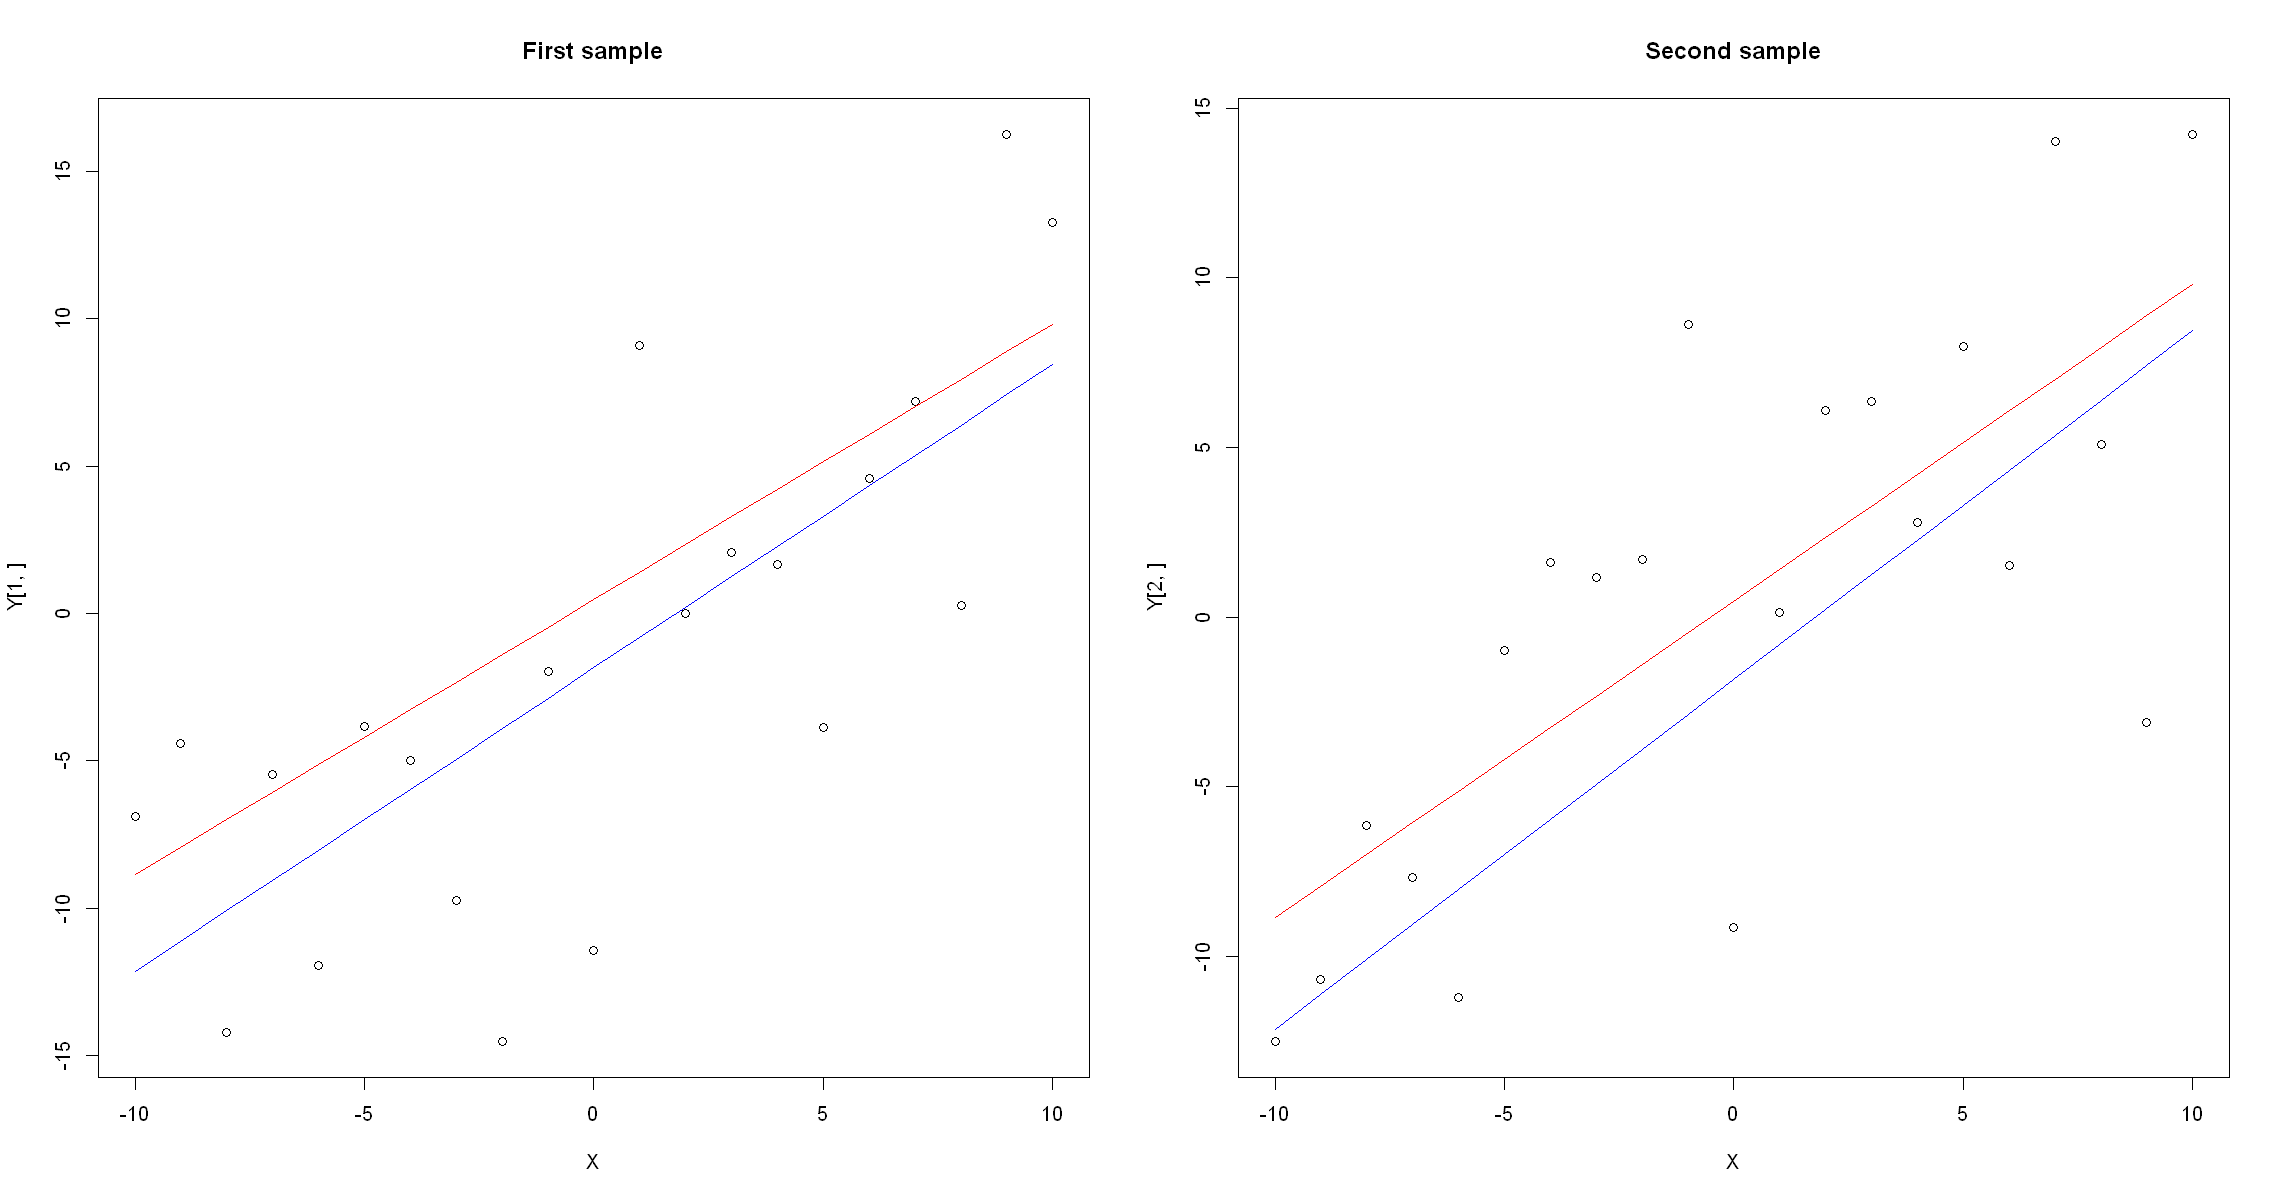

In [19]:
par(mfrow=c(1,2))
plot(X,Y[1,])
lines(X,Y_hat[1,],col="blue")
lines(X,Y_hat[2,],col="red")
title("First sample")
plot(X,Y[2,])
lines(X,Y_hat[1,],col="blue")
lines(X,Y_hat[2,],col="red")
title("Second sample")

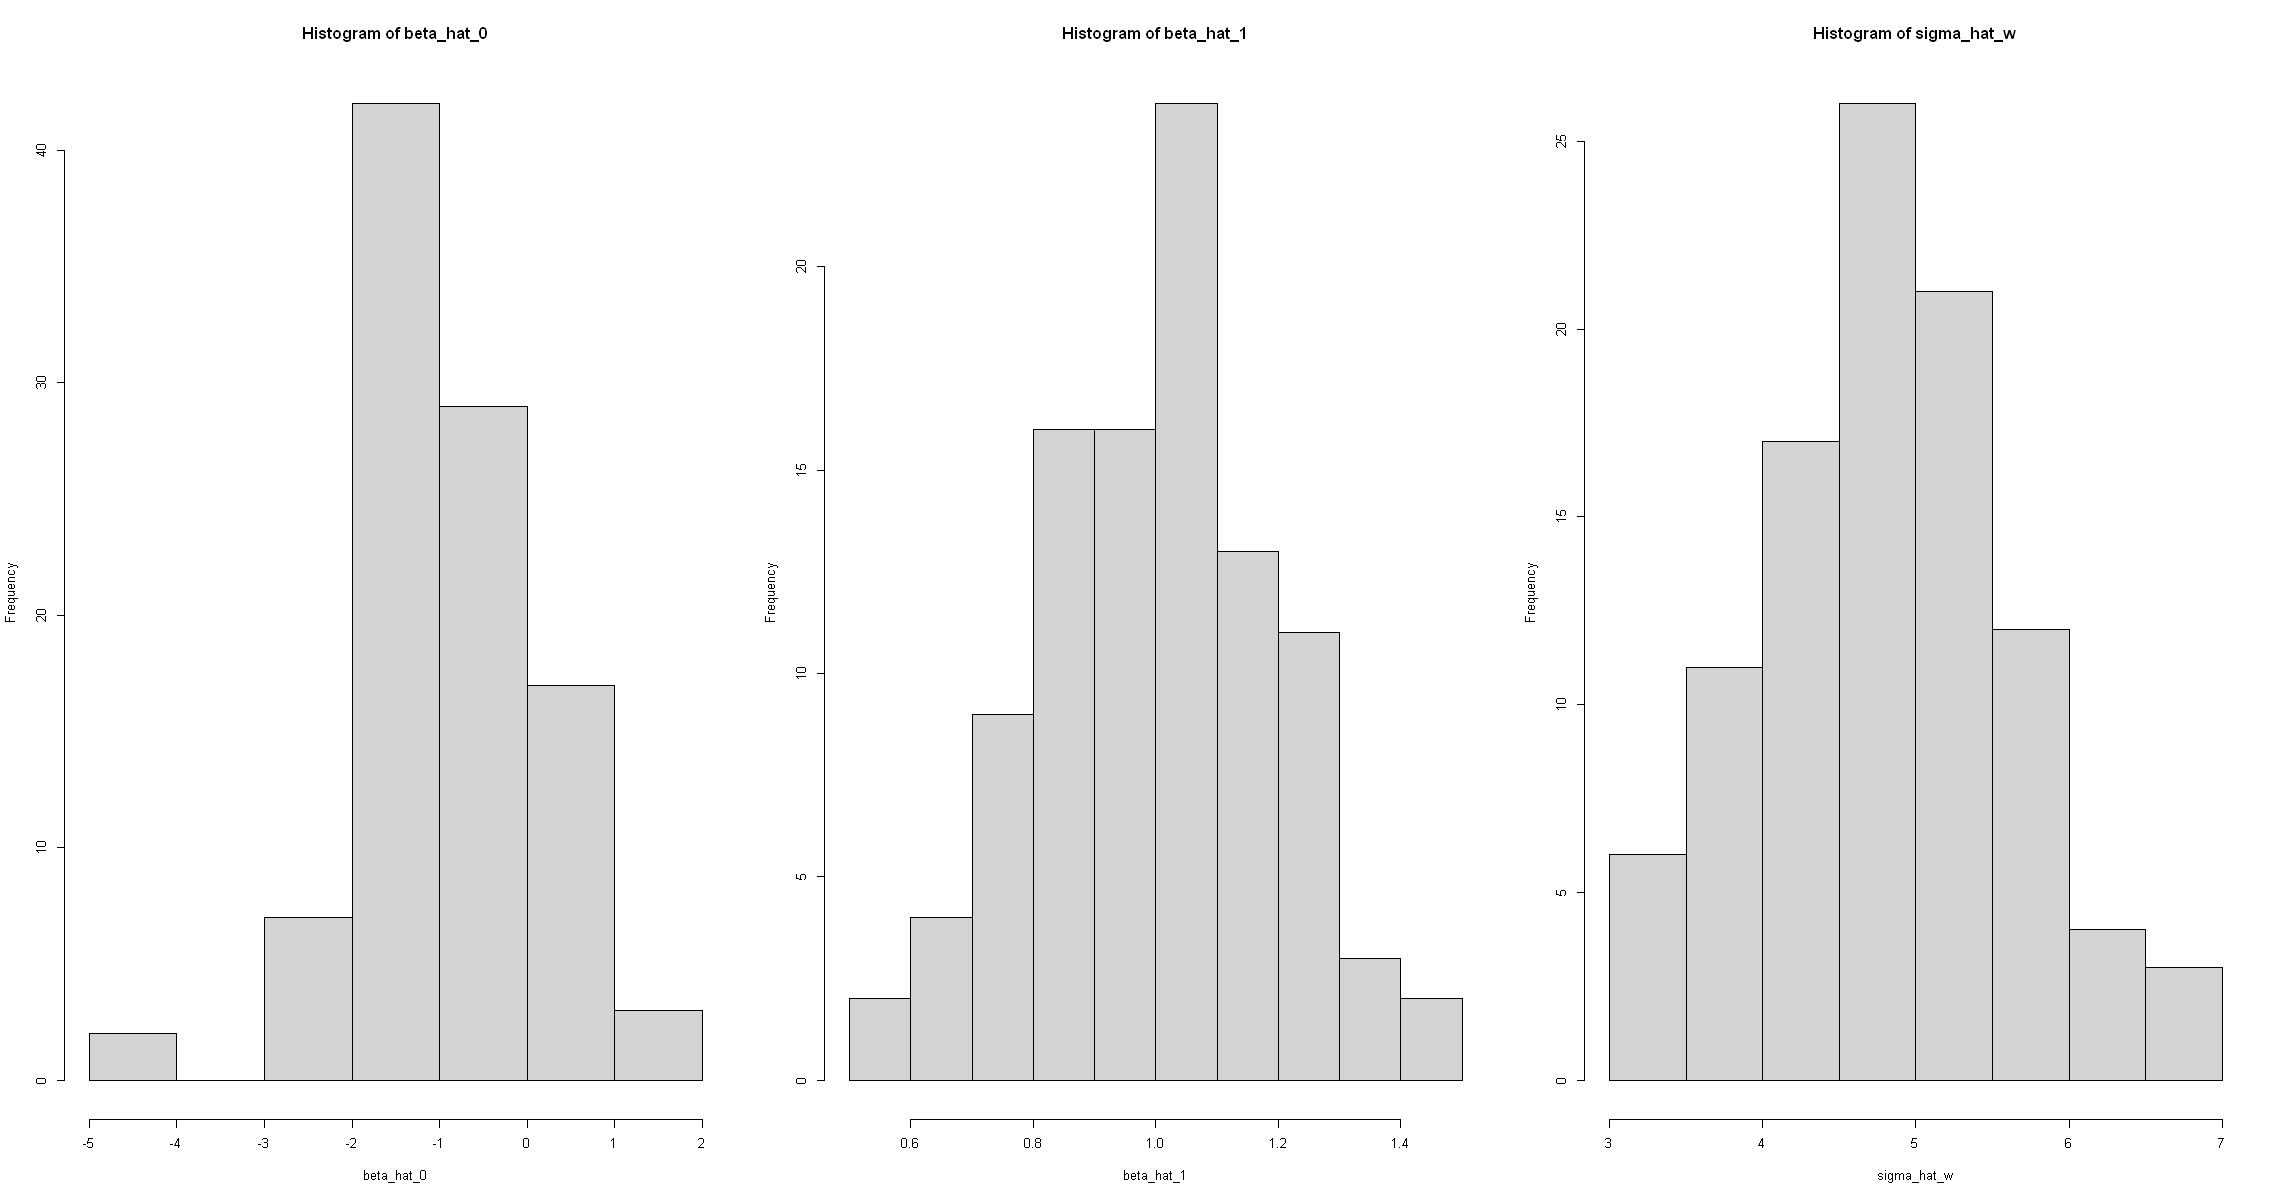

In [20]:
par(mfrow=c(1,3))
hist(beta_hat_0)
hist(beta_hat_1)
hist(sigma_hat_w)


In [21]:
print(paste("Empirical values - beta_0:",mean(beta_hat_0),"- beta_1:",mean(beta_hat_1),"- sigma_w:",mean(sigma_hat_w)))
print(paste("True values - beta_0:",beta0,"- beta_1:",beta1,"- sigma_w:",sd_w))

[1] "Empirical values - beta_0: -1.01136643164126 - beta_1: 1.00555659188585 - sigma_w: 4.82820312295283"
[1] "True values - beta_0: -1 - beta_1: 1 - sigma_w: 5"


* Illustrate the theorem $Var[y(x)]=\sigma^2\left(\frac{1}{N}+\frac{(x-\bar{x})^2}{S_{xx}}\right)$.


In [22]:
for(i in 1:N){
    var_y_emp <- var(Y_hat[,i])
    var_y_theo <- sd_w^2*(1/N+((X[i]-X_bar)^2)/S_xx)
    print(paste("Var[y(x)]=",var_y_emp))
    print(paste("Theoretical=",var_y_theo))
}

[1] "Var[y(x)]= 5.00581314618473"
[1] "Theoretical= 4.43722943722944"
[1] "Var[y(x)]= 4.27860816996147"
[1] "Theoretical= 3.82034632034632"
[1] "Var[y(x)]= 3.62637526244135"
[1] "Theoretical= 3.26839826839827"
[1] "Var[y(x)]= 3.04911442362436"
[1] "Theoretical= 2.78138528138528"
[1] "Var[y(x)]= 2.54682565351051"
[1] "Theoretical= 2.35930735930736"
[1] "Var[y(x)]= 2.11950895209979"
[1] "Theoretical= 2.0021645021645"
[1] "Var[y(x)]= 1.76716431939221"
[1] "Theoretical= 1.70995670995671"
[1] "Var[y(x)]= 1.48979175538776"
[1] "Theoretical= 1.48268398268398"
[1] "Var[y(x)]= 1.28739126008644"
[1] "Theoretical= 1.32034632034632"
[1] "Var[y(x)]= 1.15996283348826"
[1] "Theoretical= 1.22294372294372"
[1] "Var[y(x)]= 1.10750647559321"
[1] "Theoretical= 1.19047619047619"
[1] "Var[y(x)]= 1.1300221864013"
[1] "Theoretical= 1.22294372294372"
[1] "Var[y(x)]= 1.22750996591253"
[1] "Theoretical= 1.32034632034632"
[1] "Var[y(x)]= 1.39996981412688"
[1] "Theoretical= 1.48268398268398"
[1] "Var[y(x)]= 1.6474

## Multiple regression exercise

This example is taken from the theoretical part of this course (slide 27 of the chapter [Regression Modelling](https://uv.ulb.ac.be/pluginfile.php/1257537/mod_resource/content/4/linregr.pdf)).

Mutiple linear dependence occurs when the variable $x$ is a vector instead of a scalar. The goal of this exercise is to verify the theoretical results for the estimators $\hat{\mathbf{\sigma}}^2$ and $\hat{\mathbf{\beta} }$ obtained for the least squares method (no bias and analytical results concerning $Var[\hat{\mathbf{\beta}}]$).


In [23]:
rm(list=ls())
library(MASS)

# initial values for n, (sigma_w) and beta
n<-3 # number of input variables
p<-n+1
beta<-seq(2,p+1) # beta =(2,3,...,n+2)
sd_w<-5  

# generating data D_N
N<-100 # number of samples
X<-array(runif(N*n,min=-20,max=20),c(N,n))
X<-cbind(array(1,c(N,1)),X)


R<-100#00 # number of iterations
beta_hat<-array(0,c(p,R))
sigma_hat_w<-numeric(R)
Y_hat<-array(NA,c(R,N))



* Compute $\hat{Y}$, $\hat{\beta}$ and $\hat{\sigma^2}$ following the equations in the course slides 35 and 36.


In [24]:
for(i in 1:R){
    Y <- X %*% beta + rnorm(N,sd=sd_w)
    
    # Betas are stored as column vectors
    beta_hat[,i] <- solve((t(X)%*%X))%*%t(X)%*%Y
    
    Y_hat[i,] <- X %*% beta_hat[,i]
    e <- Y - Y_hat[i,]
    sigma_hat_w[i] <- sqrt((t(e)%*%e)/ (N-p))
}

In [25]:
beta_hat

2.013751,2.233137,1.517978,1.480298,1.503943,2.833196,1.702313,1.708634,2.412881,2.018699,...,1.710153,3.209026,1.687932,2.754218,2.867067,1.343540,2.407914,2.123757,1.518153,2.477399
2.977433,3.036377,2.948890,2.958619,3.007795,2.940512,3.015353,2.971959,3.049377,2.992759,...,3.051328,3.002291,3.075168,2.967975,3.056967,2.952156,3.029092,3.045038,3.034852,2.955137
3.990720,3.998904,3.939477,4.088977,3.989154,3.940724,4.030832,4.014671,4.010751,3.965567,...,4.064927,3.934425,3.969219,3.992176,3.955975,4.037555,4.094551,4.020913,3.929532,3.941398
4.971418,4.909828,4.956041,5.113694,4.991204,4.990835,5.014556,4.957446,5.022811,5.043813,...,5.002243,5.010626,5.057176,4.975994,4.950848,5.090275,5.047370,4.984500,5.055239,4.976368


* Plot the histograms for $\hat{\sigma}$ and for each $\hat{\beta}$


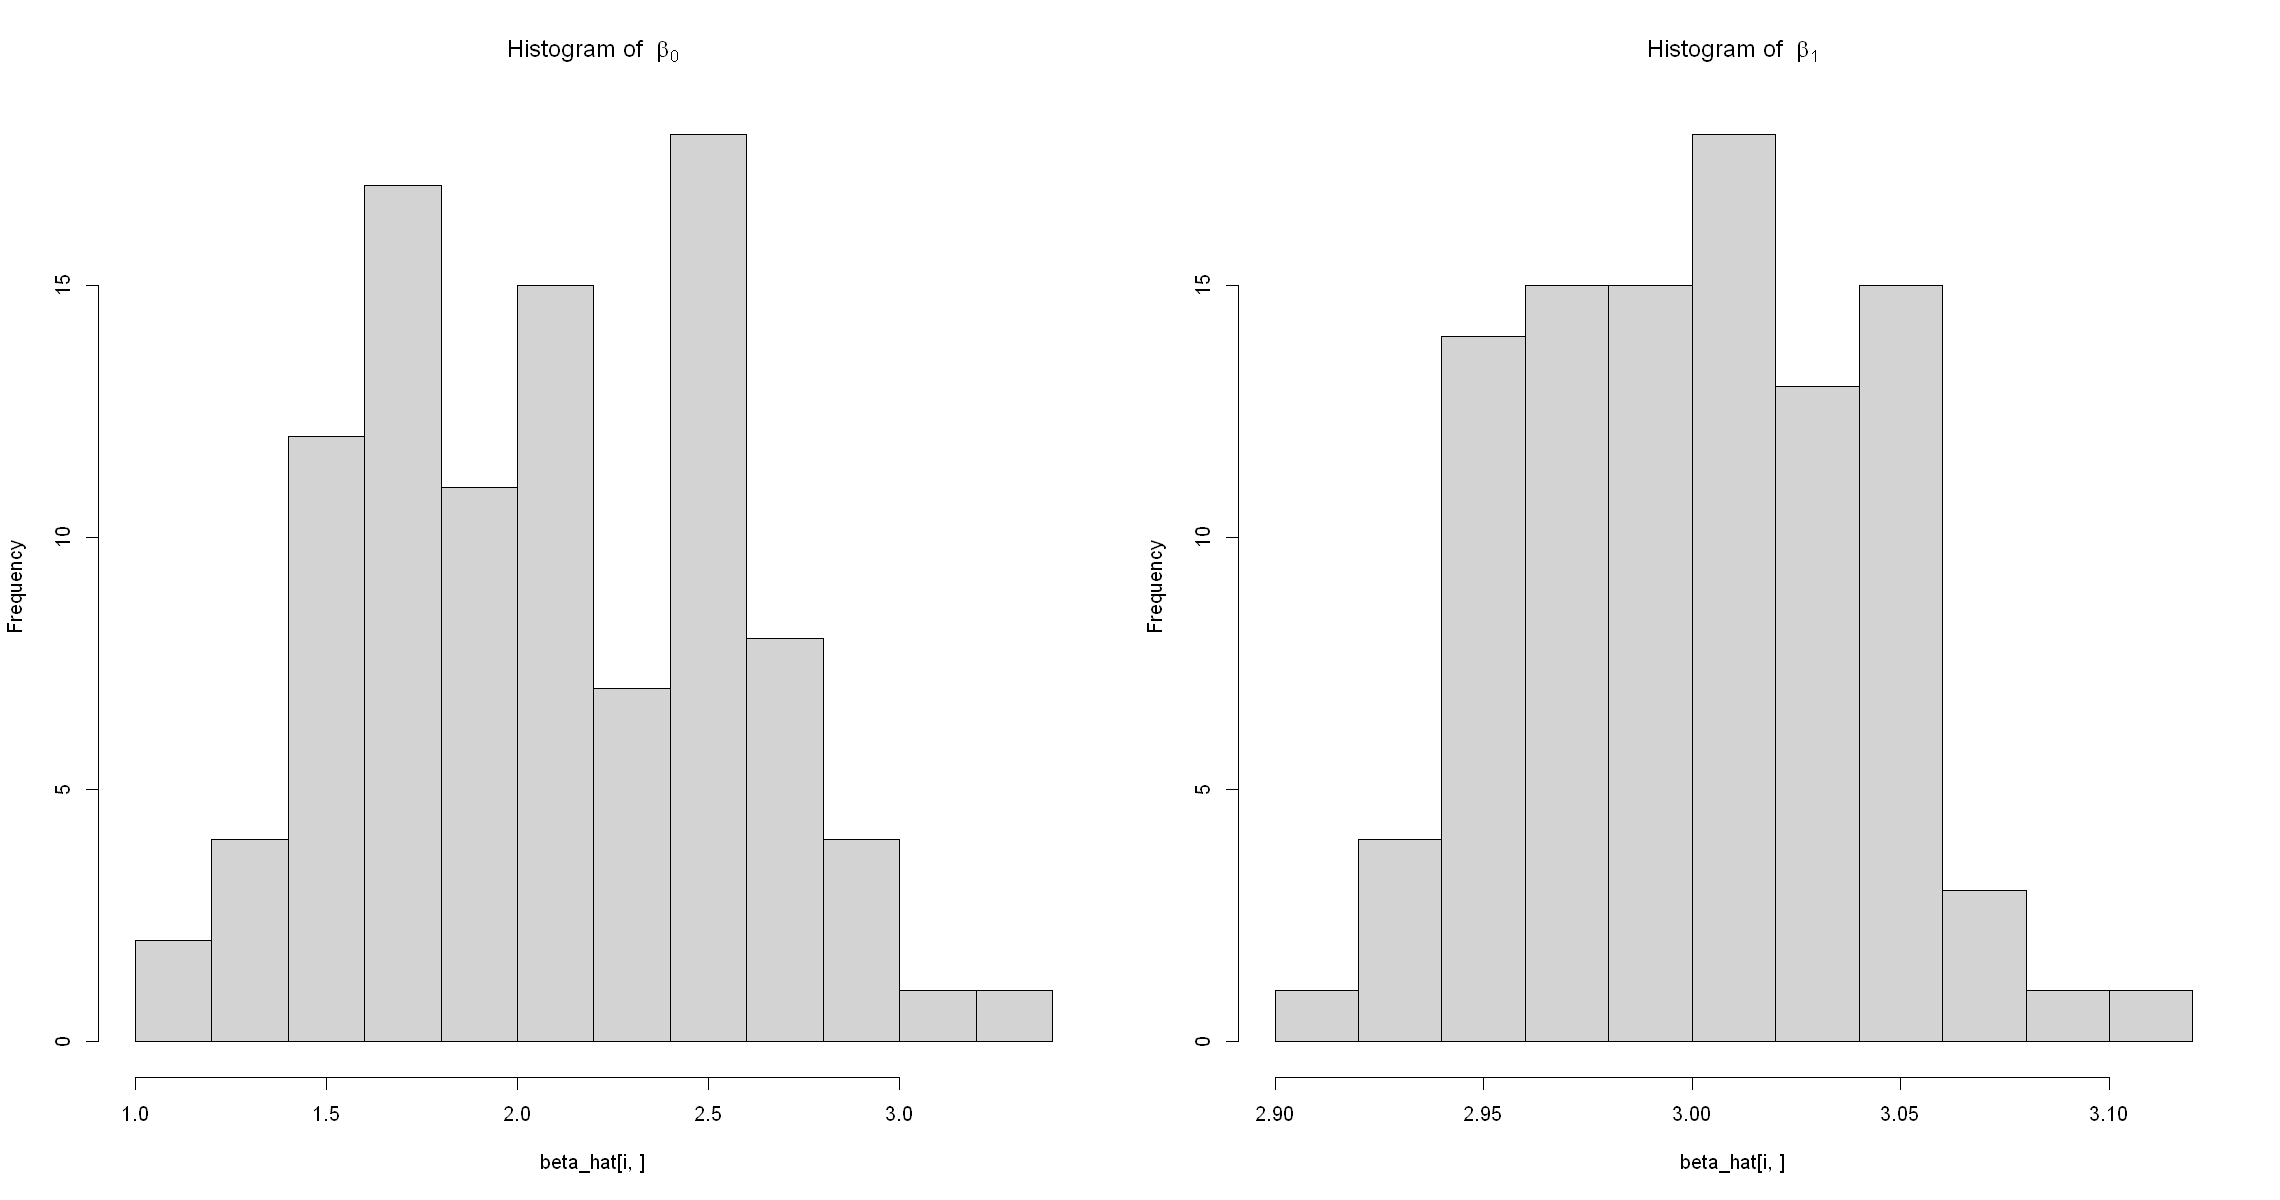

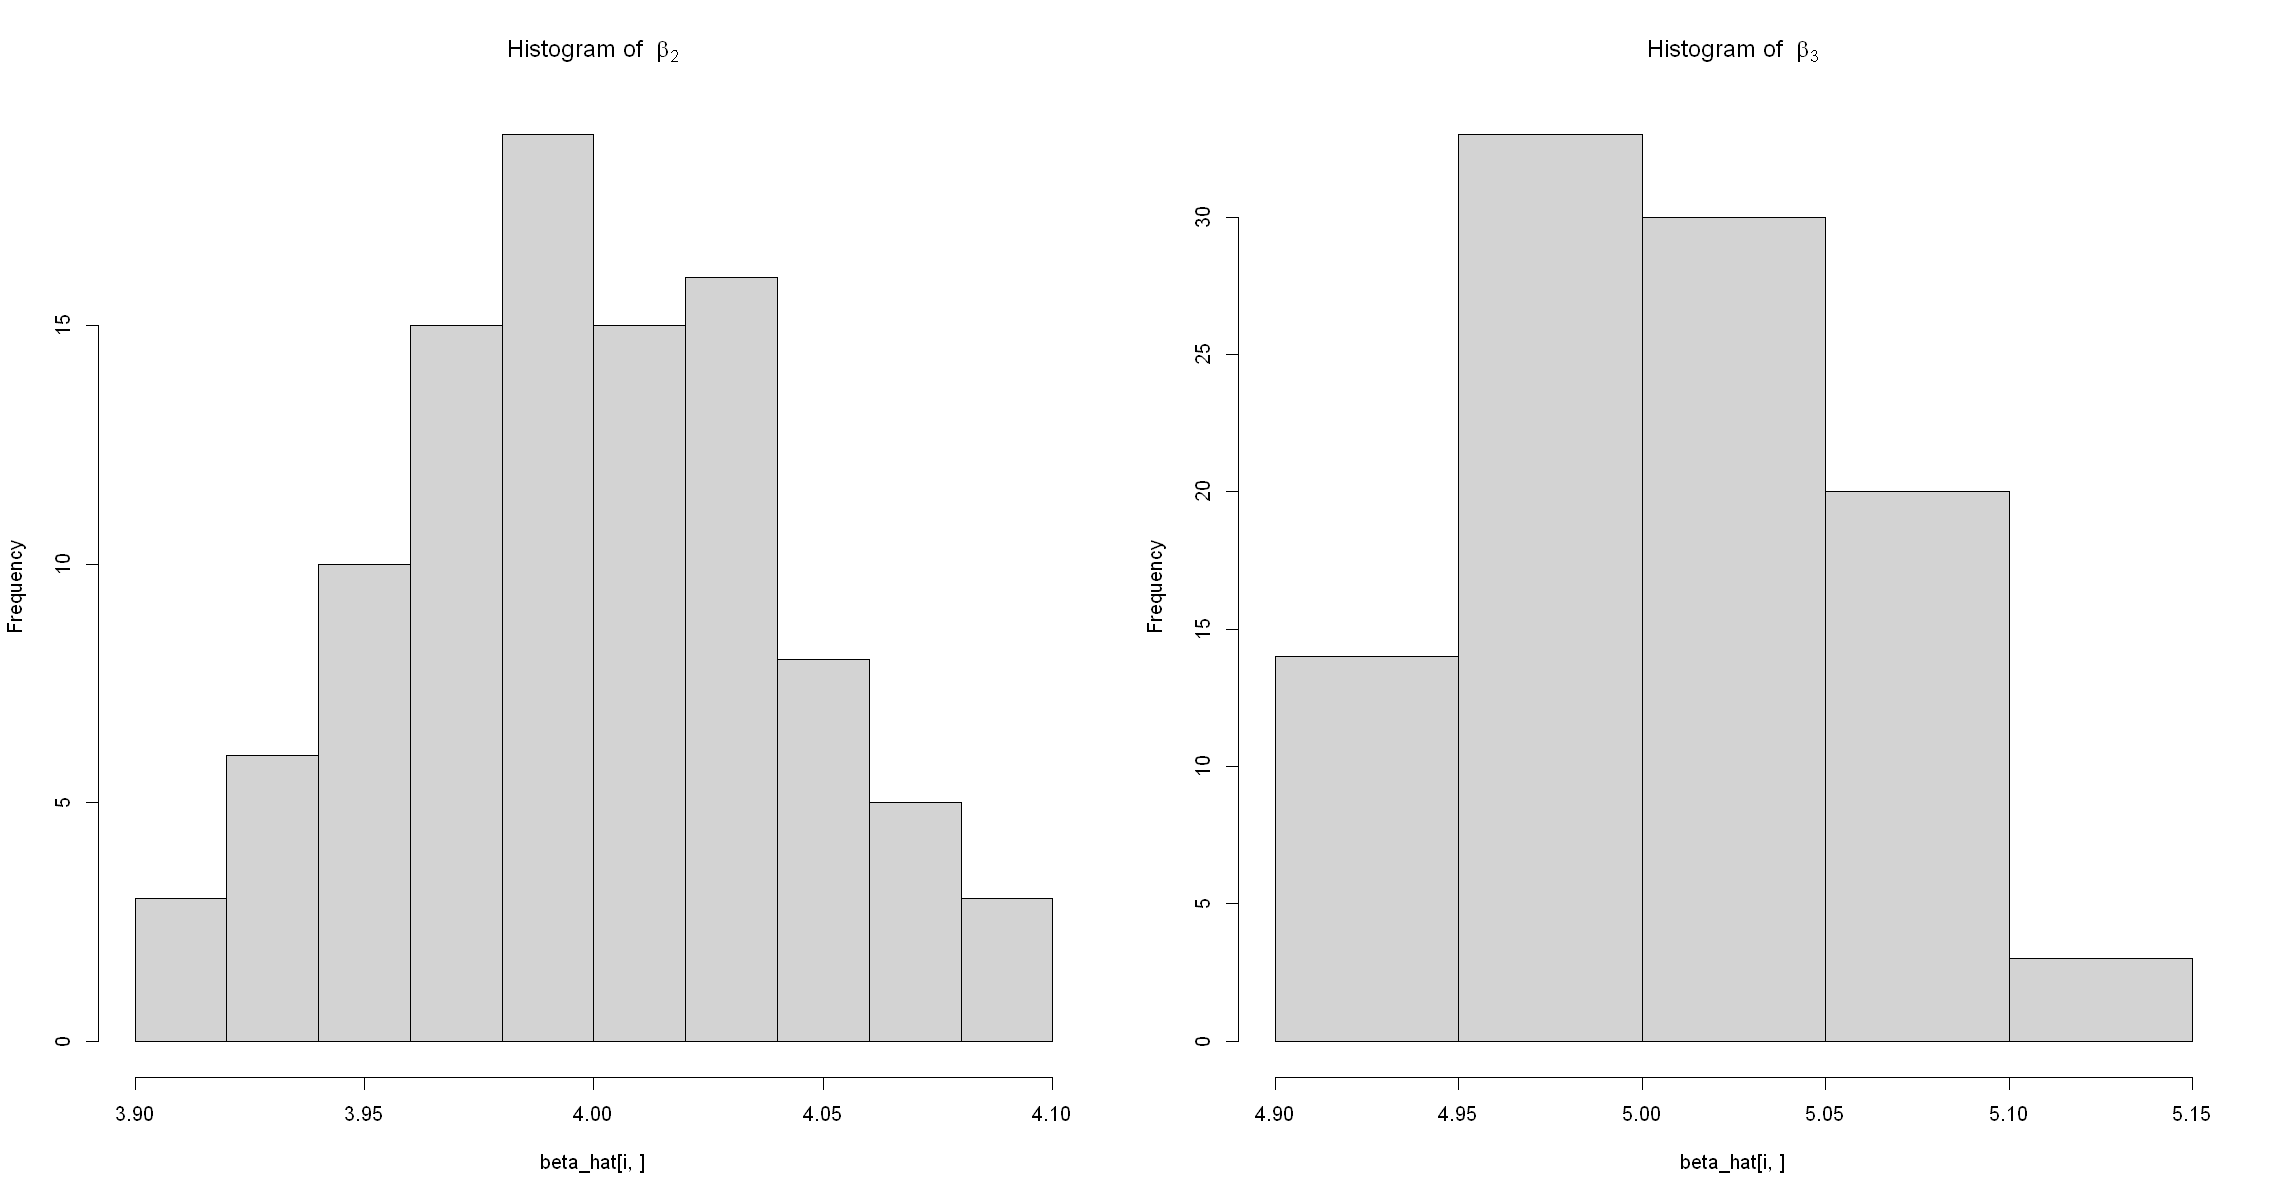

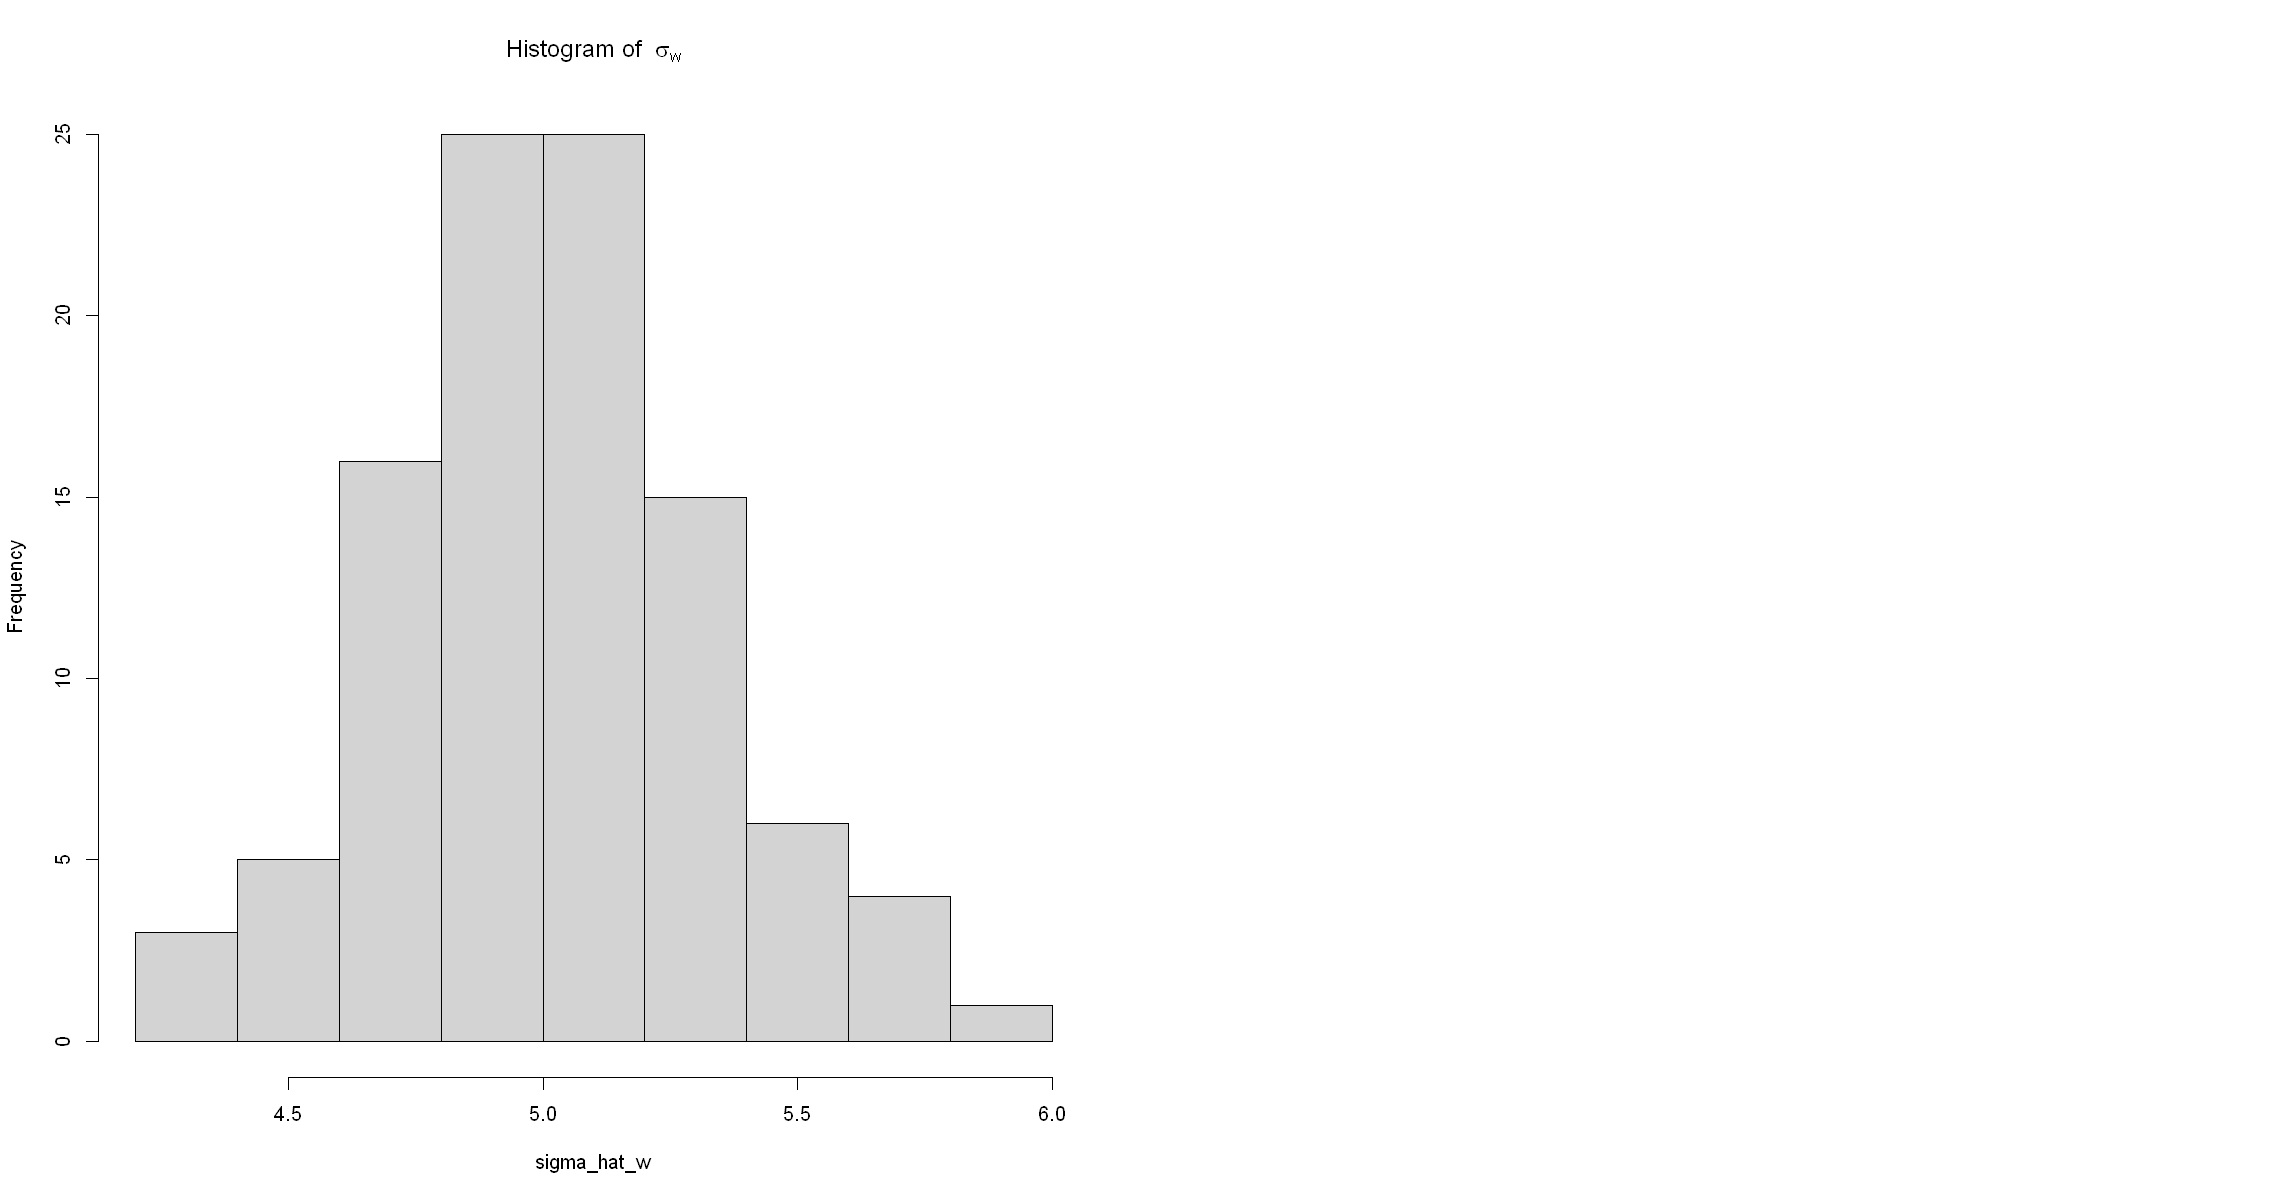

In [26]:
par(mfrow=c(1,2))
for(i in 1:p){
  hist(beta_hat[i,],main=bquote("Histogram of "~beta[.(i-1)]))
}
hist(sigma_hat_w,main=bquote("Histogram of "~sigma[w]))